# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

%time
import os
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline

import statsmodels.api as sm

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.78 µs


In [2]:
%time

_features = './features.txt'
_subject_train = './subject_train.txt'
_X_train = './X_train.txt'
_subject_test = './subject_test.txt'
_X_test = './X_test.txt'
_y_train = './y_train.txt'
_y_test = './y_test.txt'

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.39 µs


In [3]:
%time

features = (pd.read_csv(filepath_or_buffer=_features,
                        sep='?',
                        header=None)
              .squeeze('columns'))

subject_train = (pd.read_csv(filepath_or_buffer=_subject_train,
                             header=None)
                   .squeeze('columns'))

subject_test = (pd.read_csv(filepath_or_buffer=_subject_test,
                            header=None)
                   .squeeze('columns'))

X_train = (pd.read_csv(filepath_or_buffer=_X_train,
                       header=None,
                       names=features,
                       delim_whitespace=True)
             .assign(subject_train=subject_train))

y_train = (pd.read_csv(filepath_or_buffer=_y_train,
                      header=None)
             .squeeze('columns'))

X_test = (pd.read_csv(filepath_or_buffer=_X_test,
                      header=None,
                      names=features,
                      delim_whitespace=True)
             .assign(subject_test=subject_test))

y_test = (pd.read_csv(filepath_or_buffer=_y_test,
                      header=None)
            .squeeze('columns'))

X_train['individuo'] = subject_train
X_test['individuo'] = subject_test
X_train.set_index([X_train.index, 'individuo'], drop=True)

#X_test = X_test.set_index([X_test.index, 'individuo'], drop=True)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.82 µs


<ipython-input-3-f446c16c3850>:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = (pd.read_csv(filepath_or_buffer=_X_train,
<ipython-input-3-f446c16c3850>:26: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = (pd.read_csv(filepath_or_buffer=_X_test,


,,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)",subject_train
,individuo,,,,,,,,,,,,,,,,,,,,,
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1
2,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1
3,1,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1
4,1,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,30,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30
7348,30,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30
7349,30,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30


In [4]:
y_train

,0
0,5
1,5
2,5
3,5
4,5
...,...
7347,2
7348,2
7349,2
7350,2


### 2. Calcule os ```ccp_alphas```.

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [5]:
%%time

top_test = X_test[['53 tGravityAcc-min()-X','382 fBodyAccJerk-bandsEnergy()-1,8','42 tGravityAcc-mean()-Y']]
top_train = X_train[['53 tGravityAcc-min()-X','382 fBodyAccJerk-bandsEnergy()-1,8','42 tGravityAcc-mean()-Y']]

CPU times: user 2.45 ms, sys: 0 ns, total: 2.45 ms
Wall time: 6.37 ms


In [6]:
%%time

clf = DecisionTreeClassifier(random_state=42, min_samples_leaf=20).fit(top_train, y_train)
path = clf.cost_complexity_pruning_path(top_test, y_test)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

CPU times: user 58.6 ms, sys: 1.9 ms, total: 60.5 ms
Wall time: 129 ms


### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [7]:
%%time

grid_parametros = {'ccp_alpha':ccp_alphas}

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10.7 µs


In [8]:
%%time

grid = GridSearchCV(estimator = clf, param_grid=grid_parametros,cv=10, verbose=100)
grid.fit(top_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10; 1/50] START ccp_alpha=0.0.............................................
[CV 1/10; 1/50] END ..............ccp_alpha=0.0;, score=0.713 total time=   0.1s
[CV 2/10; 1/50] START ccp_alpha=0.0.............................................
[CV 2/10; 1/50] END ..............ccp_alpha=0.0;, score=0.796 total time=   0.1s
[CV 3/10; 1/50] START ccp_alpha=0.0.............................................
[CV 3/10; 1/50] END ..............ccp_alpha=0.0;, score=0.800 total time=   0.1s
[CV 4/10; 1/50] START ccp_alpha=0.0.............................................
[CV 4/10; 1/50] END ..............ccp_alpha=0.0;, score=0.728 total time=   0.1s
[CV 5/10; 1/50] START ccp_alpha=0.0.............................................
[CV 5/10; 1/50] END ..............ccp_alpha=0.0;, score=0.829 total time=   0.1s
[CV 6/10; 1/50] START ccp_alpha=0.0.............................................
[CV 6/10; 1/50] END ..............ccp_alpha=0.

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(min_samples_leaf=20,
                                              random_state=42),
             param_grid={'ccp_alpha': array([0.00000000e+00, 2.20265628e-05, 2.81814888e-05, 2.93780730e-05,
       3.06542804e-05, 3.19656934e-05, 3.77047232e-05, 8.03307411e-05,
       8.54604180e-05, 1.65256700e-04, 2.45266260e-04, 2.70594797e-04,
       3.41934337e-04, 3.55789154e-04, 4.48603161e-04, 4.576...
       1.13173908e-03, 1.26730694e-03, 1.37081553e-03, 1.52120030e-03,
       2.17075331e-03, 2.33431099e-03, 2.67539573e-03, 2.80500045e-03,
       3.25505410e-03, 3.34011754e-03, 3.94972136e-03, 4.01299501e-03,
       4.28955805e-03, 4.77205899e-03, 5.85801834e-03, 6.02191931e-03,
       7.40923241e-03, 1.18778641e-02, 1.19646657e-02, 1.55748632e-02,
       2.01302652e-02, 3.76671340e-02, 6.84978462e-02, 7.71526857e-02,
       1.66956515e-01, 1.78991416e-01])},
             verbose=100)

### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [9]:
grid.best_score_

0.8072593167701865

In [10]:
melhor_ccp = DecisionTreeClassifier(random_state=2360873, ccp_alpha=0.8072593167701865).fit(top_train, y_train)

In [11]:
clf.score(top_test, y_test)

0.7360027146250424

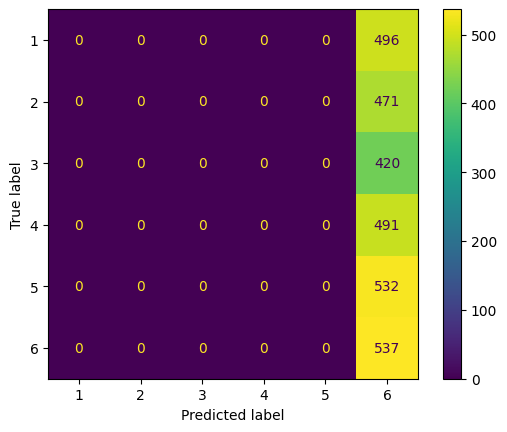

In [12]:
y_pred = melhor_ccp.predict(top_test)
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
cm

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [13]:
# Define o limiar entre 4 e 5 - atividade de interesse 5 = atividade em pé

y_treino = y_train.replace({5:1, 1:0,2:0, 3:0,4:0, 6:0})

# Cria a variável binária

y_treino

,0
0,1
1,1
2,1
3,1
4,1
...,...
7347,0
7348,0
7349,0
7350,0


In [14]:
X_treino = X_train.copy()

In [15]:
arvore = DecisionTreeClassifier(random_state=2360873, max_depth=4, min_samples_leaf=20).fit(X_treino, y_treino)
best_variavel = pd.DataFrame({'Variavel': arvore.feature_importances_},
                             index=X_treino.columns).sort_values(by='Variavel', ascending=False)
best_variavel.head(3)

,Variavel
42 tGravityAcc-mean()-Y,0.328048
297 fBodyAcc-skewness()-X,0.301851
"411 fBodyAccJerk-bandsEnergy()-9,16",0.130431


In [16]:
X_novoteste = X_test[['42 tGravityAcc-mean()-Y','297 fBodyAcc-skewness()-X','411 fBodyAccJerk-bandsEnergy()-9,16']]
X_novotreino = X_train[['42 tGravityAcc-mean()-Y','297 fBodyAcc-skewness()-X','411 fBodyAccJerk-bandsEnergy()-9,16']]

In [17]:
y_teste = y_test.replace({5:1, 1:0,2:0, 3:0,4:0, 6:0})

In [18]:
nova_arvore = DecisionTreeClassifier(random_state=2360873, ccp_alpha=0.8072593167701865).fit(X_novotreino, y_treino)
nova_acuracia = nova_arvore.score(X_novoteste, y_teste)

print(f'Acurácia: {nova_acuracia*100:.2f}')

Acurácia: 81.95
